# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import wordcloud as wc
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

### Understanding the structure of the data

In [ ]:
# Mounting the Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Reading the data from the Google Drive
df = pd.read_csv('/content/drive/MyDrive/UTDSBA/Project_1/foodhub_order.csv')
# Displaying the first 5 rows of the Dataset
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

In [ ]:
#Displaying the last 5 rows of the Dataset
df.tail()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31
1897,1478056,120353,Blue Ribbon Sushi,Japanese,19.45,Weekend,Not given,28,24



### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

###**Answer 1**

In [ ]:
# this code will display the Rows and Columns of the Dataset
df.shape

(1898, 9)

In [ ]:
print("There are", df.shape[0],"rows and",df.shape[1],"columns.")

There are 1898 rows and 9 columns.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

###**Answer 2:**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
#### There are 5 numerical and 3 categorical variable columns  in the dataset.
#### Also, the rating column appears to be object but it should be a numerical column.


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

###**Answer 3:**

In [ ]:
#the missing values in the data set
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
Foodhub_Revenue          0
total_time               0
dtype: int64

In [ ]:
#lets see the unique values in rating column
df['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

In [ ]:
#we can replace "Not Given" with nan
#df['rating']=df['rating'].replace(['Not given'],np.nan)

In [ ]:
#changing the data to float
#df['rating']=df['rating'].astype(float)

In [ ]:
df['rating']

0       Not given
1       Not given
2               5
3               3
4               4
          ...    
1893            5
1894            5
1895    Not given
1896            5
1897    Not given
Name: rating, Length: 1898, dtype: object

In [ ]:
df['rating'].apply(type).value_counts()

<class 'str'>    1898
Name: rating, dtype: int64

#### Observations:
####Yes, There is missing data in the dataset,Looks like it is in a string data type with values like "Not given".


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

###**Answer 4**

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


#### Observations:


In [ ]:
print(" Once the order is placed, The minimum amount of time to prepare food is",df['food_preparation_time'].min(),"minutes")
print(" Once the order is placed, The average amount of time to prepare food is",round(df['food_preparation_time'].mean(),2),"minutes")
print(" Once the order is placed, The maximum amount of time to prepare food is",df['food_preparation_time'].max(),"minutes")

 Once the order is placed, The minimum amount of time to prepare food is 20 minutes
 Once the order is placed, The average amount of time to prepare food is 27.37 minutes
 Once the order is placed, The maximum amount of time to prepare food is 35 minutes


### **Question 5:** How many orders are not rated? [1 mark]

###**Answer 5:**

In [ ]:
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations:
#### There are 736 orders not rated in the data set.


#**Exploratory Data Analysis (EDA)**


### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

###**Answer 6:**

In [ ]:
print("There are total of",df['order_id'].count(),"orders in the data set.")
print("There are total of",df['customer_id'].nunique(),"customers who have ordered food using the Foodhub app.")
print("There are total of",df['restaurant_name'].nunique(),"restaurants presents in the data.")

There are total of 1898 orders in the data set.
There are total of 1200 customers who have ordered food using the Foodhub app.
There are total of 178 restaurants presents in the data.


#####Bar plot and Word space graph of cusine type






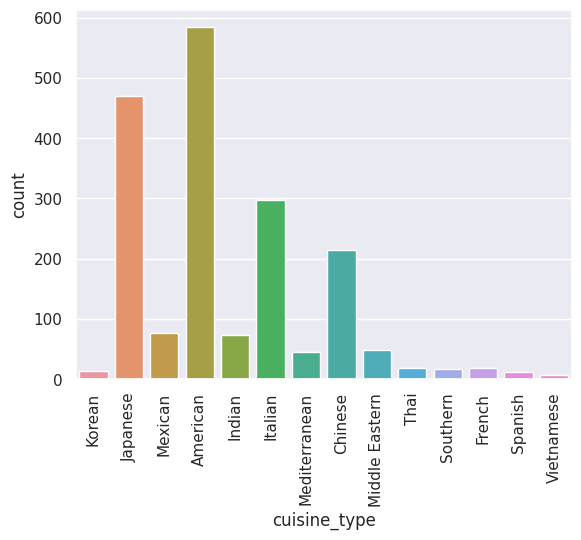

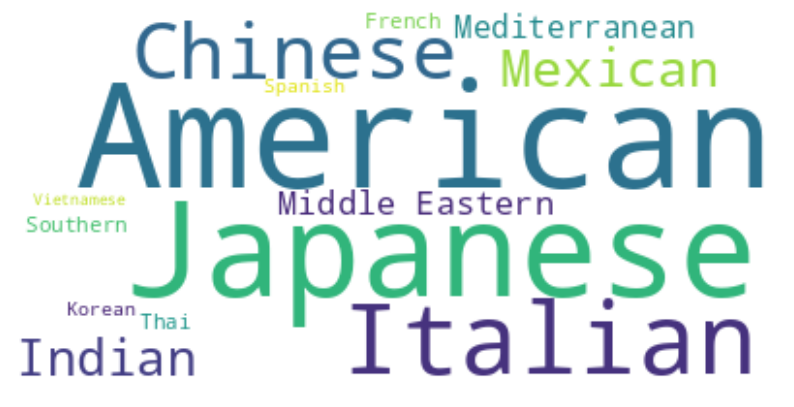

In [ ]:
sns.countplot(data=df,x='cuisine_type')
plt.xticks(rotation=90);

text = " ".join(i for i in df.cuisine_type)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

######From the data set it is visible that customers ordered American food the most.
######Also, Japanese,Italian and Chinese food has been ordered second,third and fourth most by the customers.

#####Histogram, boxplot and Density plot of cost of order

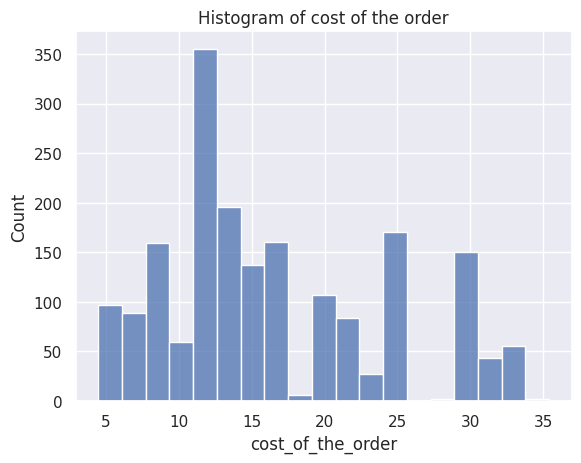

In [ ]:
plt.title("Histogram of cost of the order");
sns.histplot(data=df,x='cost_of_the_order');

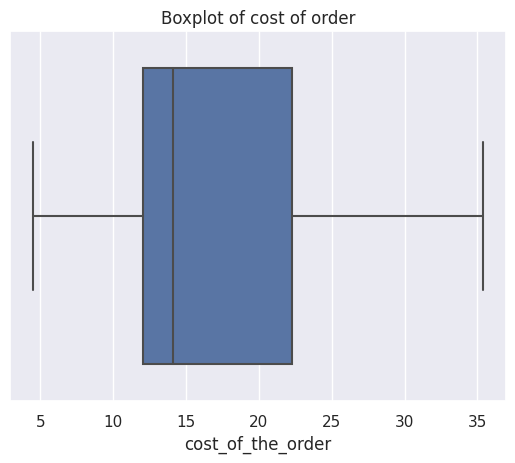

In [ ]:
plt.title("Boxplot of cost of order");
sns.boxplot(data=df,x='cost_of_the_order');

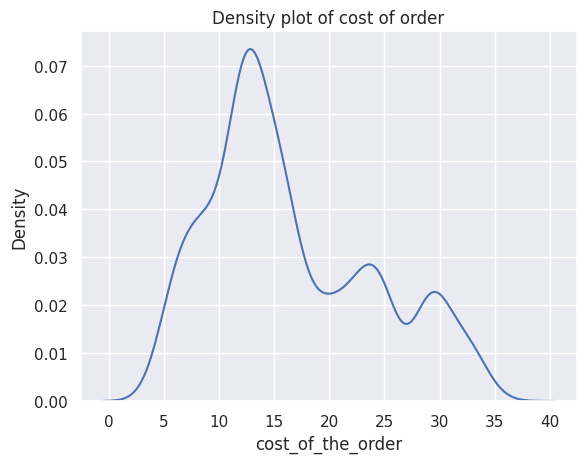

In [ ]:
plt.title("Density plot of cost of order");
sns.kdeplot(df['cost_of_the_order']);

######From the graphs above, it is clear that there are no outliers in the cost of the order data, with max price of 35 USD and min price of 5 USD.

##### Barplot for Day of the week

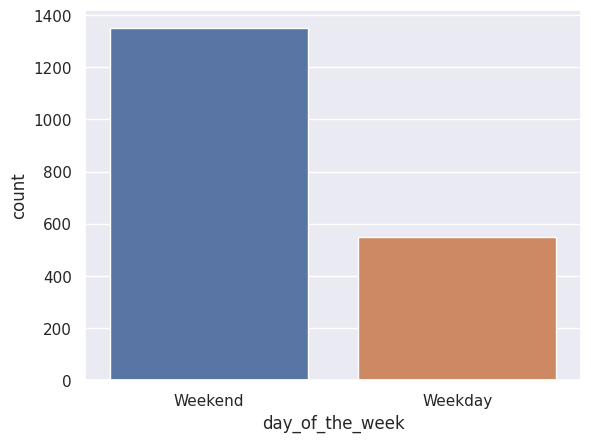

In [ ]:
sns.countplot(data=df,x='day_of_the_week');

###### It is observed that customers have ordered most during weekends. Almost more than 70% of the food has been ordered in that time.

#####Histogram and Box plot of food preparation time

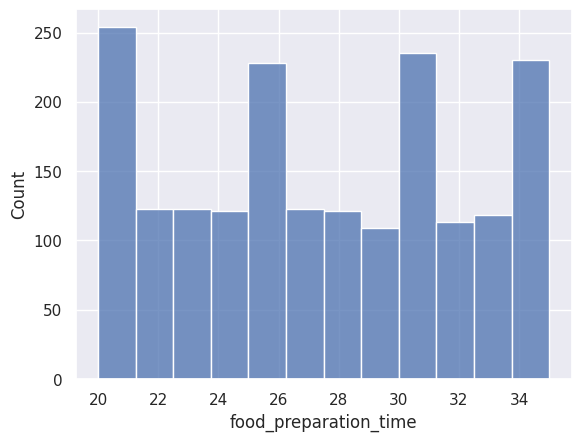

In [ ]:
sns.histplot(data=df,x='food_preparation_time');

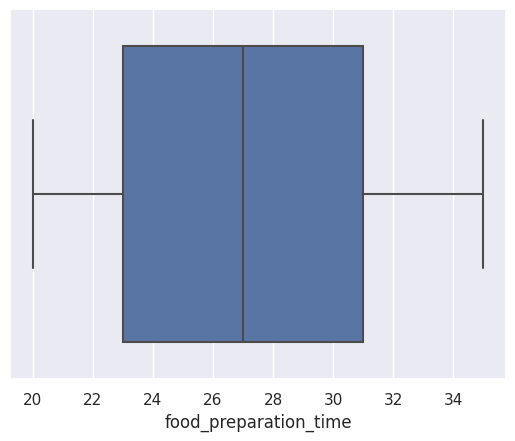

In [ ]:
sns.boxplot(data=df,x='food_preparation_time');

######It takes a minimum of 20 minutes and a maximum of 34 minutes prepare the food. From the histo gram, it is visible that more than 250 orders have taken almost 20 minutes of food preparation time.

#####Histogram and Box plot of Delivery time

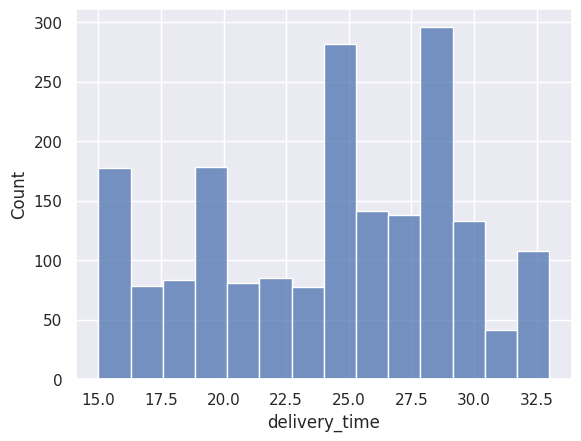

In [ ]:
sns.histplot(data=df,x='delivery_time');

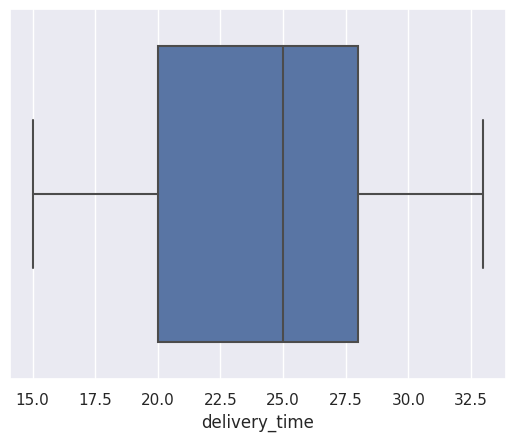

In [ ]:
sns.boxplot(data=df,x='delivery_time');

######The food has been delivered in the duration of almost 15 to 32 minutes after the food is ready to pick up. There are no outliers in the data.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

###**Answer 7:**

In [ ]:
df['restaurant_name'].value_counts().head()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

###### As it is shown above, the top 5 Restaurants are Shake Shack, The Meatball Shop, Blue Ribbon Sushi,Blue Ribbon Fried Chicked and Parm.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

###**Answer 8:**

In [ ]:
df.groupby(['day_of_the_week'])['cuisine_type'].value_counts(ascending=False)

day_of_the_week  cuisine_type  
Weekday          American          169
                 Japanese          135
                 Italian            91
                 Chinese            52
                 Indian             24
                 Mexican            24
                 Middle Eastern     17
                 Mediterranean      14
                 Southern            6
                 French              5
                 Thai                4
                 Vietnamese          3
                 Korean              2
                 Spanish             1
Weekend          American          415
                 Japanese          335
                 Italian           207
                 Chinese           163
                 Mexican            53
                 Indian             49
                 Mediterranean      32
                 Middle Eastern     32
                 Thai               15
                 French             13
                 Korean         

###### American food is most popular during the weekends with Japanese food being second most popular.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

###**Answer 9:**

In [ ]:
#This code will find all the orders that cost 20$ and divide by the total number of rows
print("There are",round(((df[df['cost_of_the_order']>20].shape[0])/(df.shape[0])*100), 2),"% orders cost more than 20 Dollars.")

There are 29.24 % orders cost more than 20 Dollars.


### **Question 10**: What is the mean order delivery time? [1 mark]

###**Answer 10:**

In [ ]:
print("The mean delivery time is",round(df['delivery_time'].mean(),2),"minutes.")

The mean delivery time is 24.16 minutes.


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

###**Answer 11:**

In [ ]:
df['customer_id'].value_counts().head()

52832     13
47440     10
83287      9
250494     8
259341     7
Name: customer_id, dtype: int64

######The customers with customer id 52832,47440 and 83287 are the top 3 most frequent customers that will get 20% discount.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


###**Answer 12:**

####Heat Map of the variable to see the correlation

<ipython-input-210-ffe7264a59df>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1);


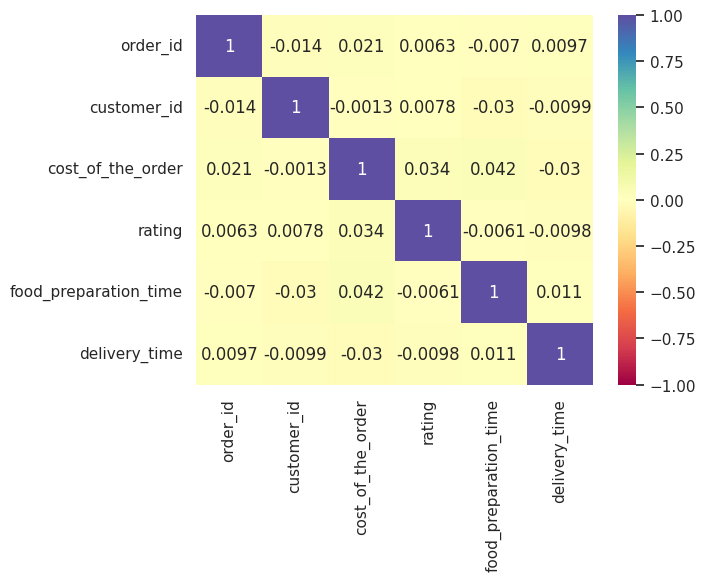

In [ ]:
sns.heatmap(df.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1);

######Rating, Food Prepartion time are closely related to cost of order.

#### As an avid fan of financial analysis, lets look at the money.
#### Revenue
#### cost of the order based on day of the week

In [ ]:
#Top Cuisine type and revenue
df.groupby(['cuisine_type'])['cost_of_the_order'].sum().sort_values(ascending=False)

cuisine_type
American          9530.78
Japanese          7663.13
Italian           4892.77
Chinese           3505.62
Mexican           1303.85
Indian            1235.14
Middle Eastern     922.21
Mediterranean      711.84
Thai               364.95
French             356.29
Southern           328.11
Spanish            227.93
Korean             182.02
Vietnamese          90.18
Name: cost_of_the_order, dtype: float64

In [ ]:
#Top 10 restaurants by revenue
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending=False).head(10)

restaurant_name
Shake Shack                      3579.53
The Meatball Shop                2145.21
Blue Ribbon Sushi                1903.95
Blue Ribbon Fried Chicken        1662.29
Parm                             1112.76
RedFarm Broadway                  965.13
RedFarm Hudson                    921.21
TAO                               834.50
Han Dynasty                       755.29
Blue Ribbon Sushi Bar & Grill     666.62
Name: cost_of_the_order, dtype: float64

In [ ]:
#Restaurants with the lowest revenuw
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending=False).tail(10)

restaurant_name
Gaia Italian Cafe                8.78
Chola Eclectic Indian Cuisine    8.73
Woorijip                         8.25
'wichcraft                       8.10
La Follia                        8.05
Market Table                     6.79
Wa Jeal                          6.74
Cipriani Le Specialita           5.92
Big Wong Restaurant _¤¾Ñ¼       5.92
Hunan Manor                      5.72
Name: cost_of_the_order, dtype: float64

######American restaurants are making more money in new york, second and third being japanese and italian respectively. Shake shack,The meat ball shop and the blue ribbon restaurant are the 3 top most earning restaurants.

#### Relation between Cuisine Type and cost of order,Food Preparation time,delivery time and Rating.

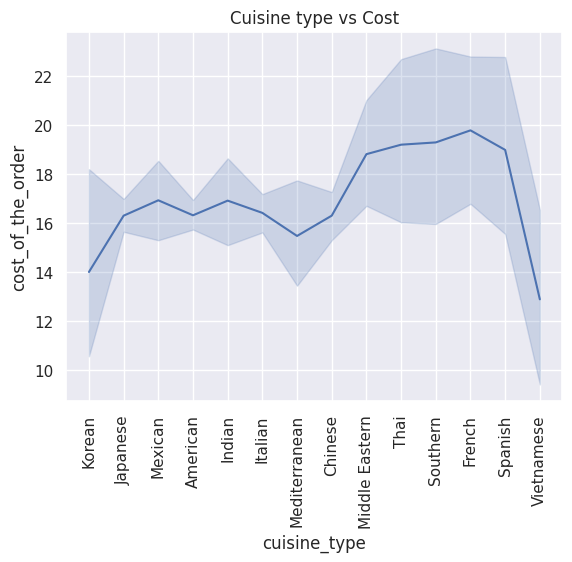

In [ ]:
plt.title("Cuisine type vs Cost");
sns.set(style='darkgrid')
sns.lineplot(data=df,x='cuisine_type',y='cost_of_the_order');
plt.xticks(rotation=90);

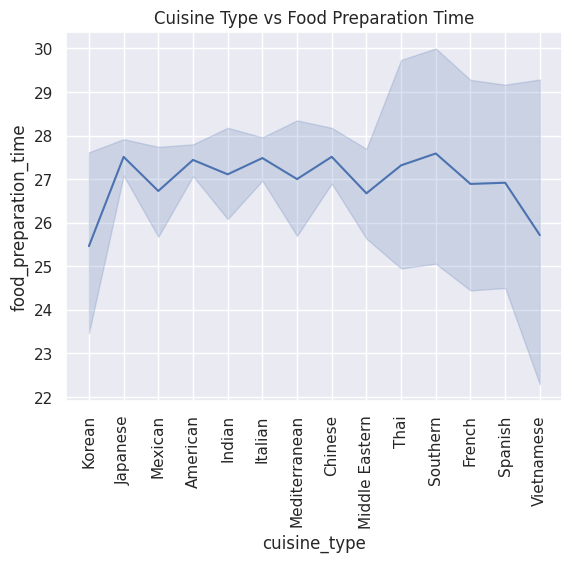

In [ ]:
plt.title("Cuisine Type vs Food Preparation Time")
sns.set(style='darkgrid');
sns.lineplot(data=df,x='cuisine_type',y='food_preparation_time');
plt.xticks(rotation=90);

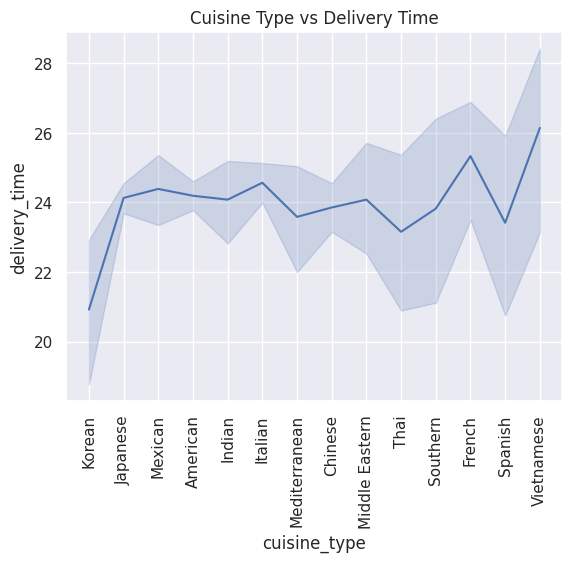

In [ ]:
plt.title("Cuisine Type vs Delivery Time");
sns.set(style='darkgrid');
sns.lineplot(data=df,x='cuisine_type',y='delivery_time');
plt.xticks(rotation=90);
plt.show()

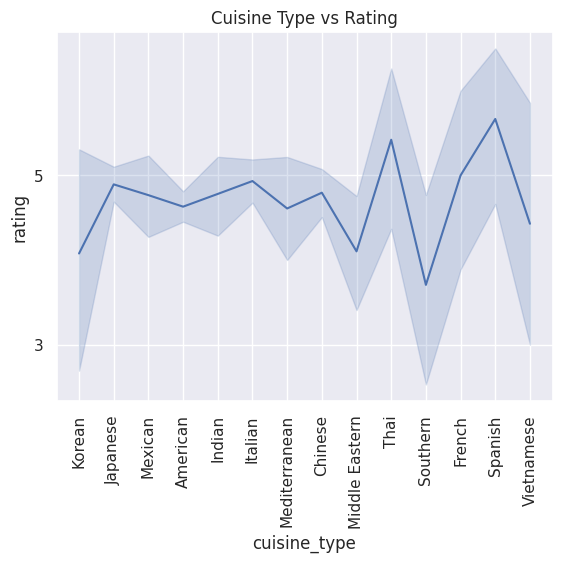

In [ ]:
plt.title("Cuisine Type vs Rating");
sns.set(style='darkgrid');
sns.lineplot(data=df,x='cuisine_type',y='rating');
plt.xticks(rotation=90);
plt.show()

######French and souther food is most expensive on average.While Korean and Vietnamese food cost less than others. Japanese,Ameican,Italian,Chinese and southern food takes almost same time to prepare.
######Thai American,Japanese and spanish cuisine has good rating on foodhub,while vietnamese,Korean and souther food has low rating.
###### French and vietnamese food take more time to deliver.                                                                     

####Relationship between rating, Food Delivery time, Cost and Preparation Time to see what is the behavior

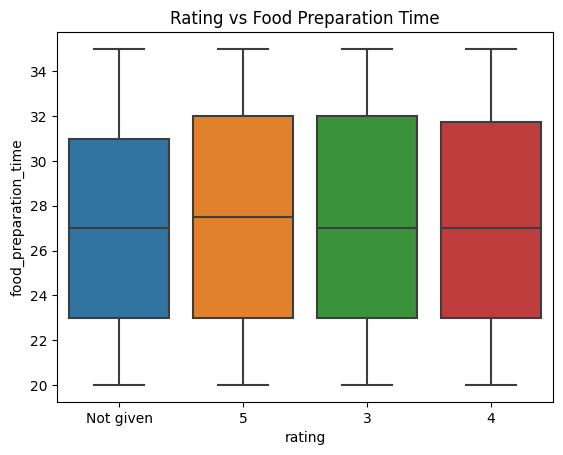

In [ ]:
plt.title("Rating vs Food Preparation Time");
sns.boxplot(data=df,x='rating',y='food_preparation_time');

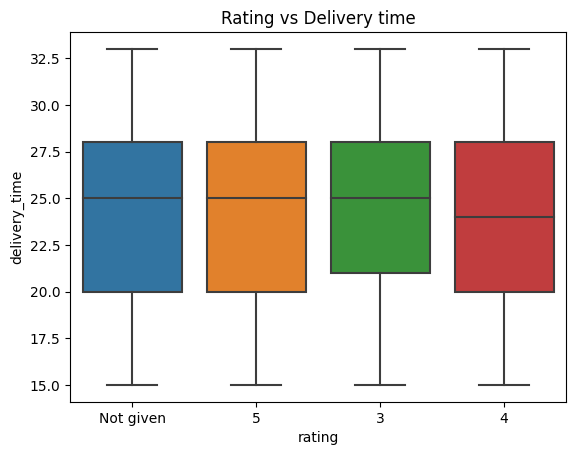

In [ ]:
plt.title("Rating vs Delivery time");
sns.boxplot(data=df,x='rating',y='delivery_time');

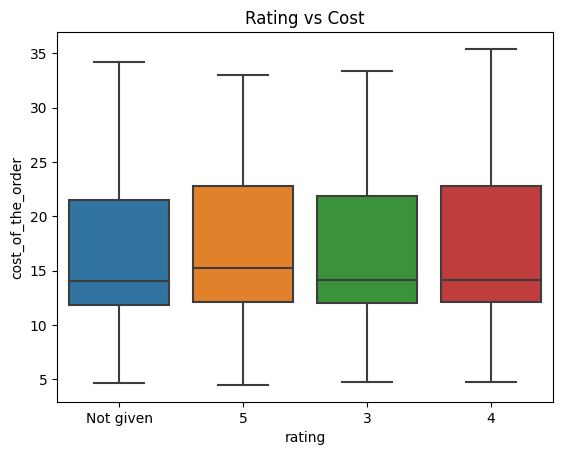

In [ ]:
plt.title("Rating vs Cost");
sns.boxplot(data=df,x='rating',y='cost_of_the_order');

######Food preparation time and cost of order does not provide good insight between rating. Where as for the mean delivery time of 25 min the mean rating is 3&5 and for mean delivery time of 24 min has mean rating  of 4.

#### lets look at the behavior between day of the day and delivery time,food preparation time and cost of order

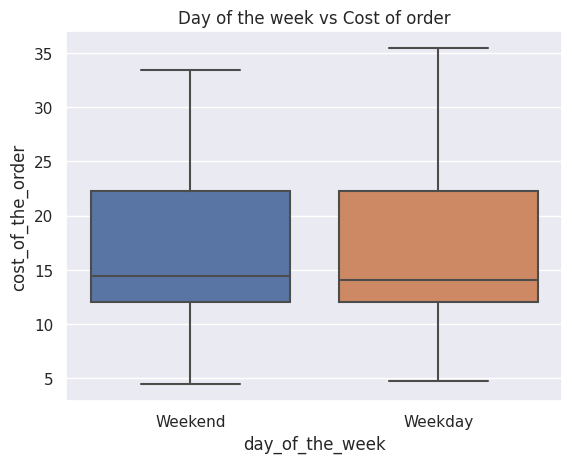

In [ ]:
plt.title("Day of the week vs Cost of order");
sns.boxplot(data=df,x='day_of_the_week',y='cost_of_the_order');

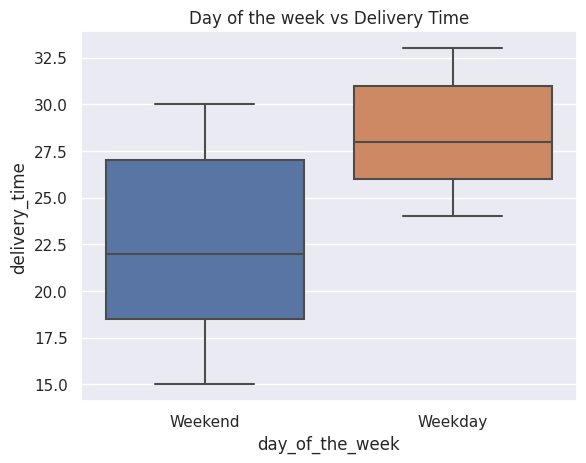

In [ ]:
plt.title("Day of the week vs Delivery Time");
sns.boxplot(data=df,x='day_of_the_week',y='delivery_time');

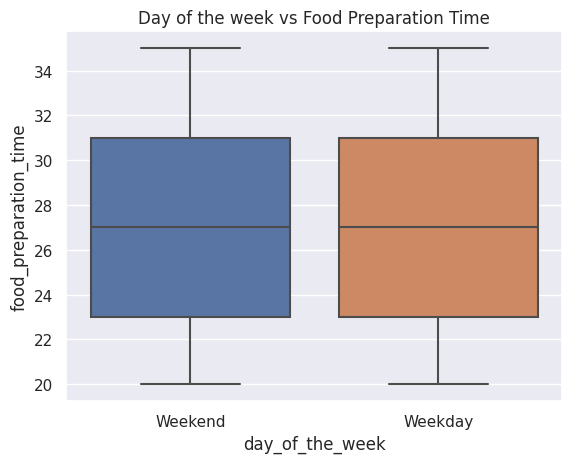

In [ ]:
plt.title("Day of the week vs Food Preparation Time");
sns.boxplot(data=df,x='day_of_the_week',y='food_preparation_time');

######On weekdays it taked a lot longer to deliver food than weekends in New York.Weekdays and weekend has same food preparation time.The cost of food is almost same during weekdays and weekends.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

###**Answer 13:**

In [ ]:
# Lets make a new dataframe excluding "Not Given" named df_newrating
df_allrating= df[df['rating'] !='Not given'].copy()
df_allrating['rating']=df_allrating['rating'].astype('int')
#Making another dataframe with restaurant name and rating
df_rating=df_allrating.groupby(['restaurant_name'])['rating'].count().sort_values(ascending=False).reset_index()
df_rating.head()

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


In [ ]:
#lets only group the restaurants with more than 50 rating
restaurant= df_rating.loc[df_rating['rating']>50]['restaurant_name']

#mean of all the reastaurants with more than 50 rating
df_mean=df_allrating[df_allrating['restaurant_name'].isin(restaurant)].copy()
#Here is the restaurants that have more than 50 ratings above 4
df_mean.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending=False).reset_index

<bound method Series.reset_index of restaurant_name
The Meatball Shop            4.511905
Blue Ribbon Fried Chicken    4.328125
Shake Shack                  4.278195
Blue Ribbon Sushi            4.219178
Name: rating, dtype: float64>

######The Meatball shop,Blue Ribbon Fried Chicked, Shake Shack and Blue Ribbon Sushi has more than 50 ratings over 4

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

###**Answer 14:**

In [ ]:
# Lets create a function for revenue
def revenue(a):
    if   a > 20:
      return a*0.25
    elif a > 5:
      return a*0.15
    else:
      return a*0

#Lets create a new column named "Foodhub_revenue" which will have all the earnings per order
df['Foodhub_Revenue'] = df['cost_of_the_order'].apply(revenue)
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Foodhub_Revenue,total_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385,49


In [ ]:
#To find our the total net revenue
total =df.sum().tail(1)
print("The total amount of money generated by food hub is" , total, "USD");

The total amount of money generated by food hub is total_time    97811
dtype: object USD


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

###**Answer 15:**

In [ ]:
#lets create a column saying 'Total_time'
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

#Lets see how many orders take more than 60 minutes to get delivered from the order is placed.
print("There are",round(((df[df['total_time']>60].shape[0])/(df.shape[0])*100), 2),"% of orders take 60 minuted to get delivered after the order is placed.")

There are 10.54 % of orders take 60 minuted to get delivered after the order is placed.


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

###**Answer 16:**

In [ ]:
round(df.groupby(['day_of_the_week'])['delivery_time'].mean(),2)

day_of_the_week
Weekday    28.34
Weekend    22.47
Name: delivery_time, dtype: float64

######Looks like the delivery time is more on weekdays than weekends.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
* Customers ordered American food the most.Also, Japanese,Italian and Chinese food has been ordered second,third and fourth most by the customers.
* There are no outliers in the cost of the order data, with max price of 35 USD and min price of 5 USD.
* It is observed that customers have ordered most during weekends. Almost more than 70% of the food has been ordered in that time.
* It takes a minimum of 20 minutes and a maximum of 34 minutes prepare the food. From the histo gram, it is visible that more than 250 orders have taken almost 20 minutes of food preparation time.
* The food has been delivered in the duration of almost 15 to 32 minutes after the food is ready to pick up. There are no outliers in the data.
* American restaurants are making more money in new york, second and third being japanese and italian respectively. Shake shack,The meat ball shop and the blue ribbon restaurant are the 3 top most earning restaurants.
* French and souther food is most expensive on average.While Korean and Vietnamese food cost less than others. Japanese,Ameican,Italian,Chinese and southern food takes almost same time to prepare.
* Thai American,Japanese and spanish cuisine has good rating on foodhub,while vietnamese,Korean and souther food has low rating.
* French and vietnamese food take more time to deliver.
* Food preparation time and cost of order does not provide good insight between rating. Where as for the mean delivery time of 25 min the mean rating is 3&5 and for mean delivery time of 24 min has mean rating of 4.
* On weekdays it taked a lot longer to deliver food than weekends in New York.Weekdays and weekend has same food preparation time.The cost of food is almost same during weekdays and weekends.

### Recommendations:

*  Food Hub should include more American,Japanese and Italian restaurants that can help increase the revenue.

* Korean,Vietnamese restaurants should improve in the delivery time,because if the delivery time is less customers tend to give good reviews and order more.

* Foodhub should include more discounts so that more orders are placed during weekdays and also improve the delivery time during weekdays.


---